## Model Description

In [1]:
# Importing the required packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from category_encoders import OneHotEncoder, TargetEncoder,BaseNEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MaxAbsScaler,RobustScaler
from sklearn.model_selection import train_test_split
import datetime
import mlflow
import os
# importing warnings to ignore it
import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.__version__

'2.0.3'

#### Data loading and Basic checks

In [3]:
# lets import the main file
data = pd.read_csv("Final_train_data.csv")
data_test = pd.read_csv("Final_test_data.csv")

In [4]:
# checking top 5 rows
data.head()

REG_NO          Brand                          Model     CC  \
0  DL11SM2526          HONDA                      ACTIVA 3G  110.0   
1  MH05DP6267            TVS                   JUPITER BSIV  110.0   
2  RJ07FS9807           HERO  HF DELUXEE I3S-SELF-DRUM-CAST   97.0   
3  MH05BN3497          BAJAJ                DISCOVER 125 ST  125.0   
4  MH05DR0018  ROYAL ENFIELD                    CLASSIC 350  350.0   

  Manufactured_Date    DEALER_ID           DEALERSHIP_NAME Purchase_date  \
0        2016-04-01  100000021.0         BAJWA AUTOMOBILES    2022-07-12   
1        2018-01-01  100000018.0  SHREE LAXMI  AUTOMOBILES    2022-11-08   
2        2019-07-01  100000013.0            SHANTI TRUMOTO    2021-02-04   
3        2012-06-01  100000018.0  SHREE LAXMI  AUTOMOBILES    2022-03-30   
4        2018-01-01  100000018.0  SHREE LAXMI  AUTOMOBILES    2022-08-26   

   Color  Purchase_Price  ... Part_Cost  \
0    NAN         25000.0  ...    417.22   
1  BLACK         29000.0  ...    390.00   
2    NAN         39437.0  ...     20.74   
3    NAN         14000.0  ...       NaN   
4    NAN        117000.0  ...    785.00   

                                  Labour_Description Labour_Amount  \
0                               WATER  WASH - SCOOTY          50.0   
1                                         CLUTCH O/H         354.0   
2                                                NaN           0.0   
3                                                NaN           0.0   
4  ENGINE O/H(CRANKSHAFT/DRIVESHAFT/CAM SHIFTER) ...         900.0   

  Refurbished_price   Sale_Date    Year  Sale_Price  Financier     Model_new  \
0             412.0  2022-07-12  2022.0    43000.00        NAN     ACTIVA 3G   
1             744.0  2022-11-08  2022.0    32000.00        NAN       JUPITER   
2              18.0  2021-08-31  2021.0    46787.56    HEROFIN     HF DELUXE   
3               NaN  2022-03-30  2022.0    16304.00        NAN  DISCOVER 125   
4            1685.0  2022-08-31  2022.0   125000.00        NAN   CLASSIC 350   

              Varient  
0                 NaN  
1                BSIV  
2  I3S SELF DRUM CAST  
3                  ST  
4                 NaN  

[5 rows x 24 columns]

In [5]:
# checking bottom 5 rows , to check any unwanted rows like totelling something kind of rows present in the data
data.tail()

REG_NO   Brand                            Model     CC  \
1994  HR26EP8341    HERO        HF DELUXEE SELF-DRUM-CAST   97.0   
1995  DL4SCU8090    HERO  SPLENDOR PLUSI3S-SELF-DRUM-CAST   97.0   
1996  AP05EW5207  YAMAHA                              R15  155.0   
1997  TN66AB8272    HERO                   PLEASURE - IBS  110.0   
1998  DL8SCQ8750     TVS                        NTORQ 125  125.0   

     Manufactured_Date    DEALER_ID             DEALERSHIP_NAME Purchase_date  \
1994        2021-02-01  100000004.0             AHINSHA TRUMOTO    2022-06-30   
1995        2018-06-01  100000003.0           KRISH AUTOMOBILES    2021-11-30   
1996        2018-07-01  100000026.0                  WHEELSMART    2022-10-11   
1997        2019-06-01  100000019.0       SRI VENKATESWAR AUTOS    2022-01-04   
1998        2019-05-01  100000017.0  RAJPOOT BEST DEALS PVT LTD    2022-10-27   

                 Color  Purchase_Price  ... Part_Cost  \
1994               NAN         45000.0  ...       NaN   
1995               NAN         38000.0  ...       NaN   
1996               NAN         77500.0  ...       NaN   
1997               NAN         68000.0  ...    380.34   
1998  MATT PEARL WHITE         60000.0  ...       NaN   

               Labour_Description Labour_Amount Refurbished_price   Sale_Date  \
1994                          NaN           0.0               NaN  2022-06-30   
1995                          NaN           0.0               NaN  2021-11-30   
1996                          NaN           0.0               NaN  2022-10-11   
1997  GENERAL SERVICING  - MCYCLE         650.0             980.0  2022-02-18   
1998                          NaN           0.0               NaN  2022-10-27   

        Year  Sale_Price  Financier      Model_new             Varient  
1994  2022.0     53000.0        NAN      HF DELUXE      DRUM SELF CAST  
1995  2021.0     49760.0        NAN  SPLENDOR PLUS  I3S SELF DRUM CAST  
1996  2022.0     84500.0        NAN            R15                 NaN  
1997  2022.0     71000.0        NAN       PLEASURE                 IBS  
1998  2022.0     80000.0        NAN      NTORQ 125                 NaN  

[5 rows x 24 columns]

In [6]:
# lets check the columns and it's value ranges
data.describe()

CC     DEALER_ID  Purchase_Price    Part_Cost  Labour_Amount  \
count  1999.000000  1.999000e+03     1999.000000   970.000000    1954.000000   
mean    132.019510  1.000000e+08    42842.173087   416.760299     113.415415   
std      54.124612  7.362289e+00    32774.793372   334.734956     239.388811   
min       0.000000  1.000000e+08        0.000000     4.000000       0.000000   
25%     110.000000  1.000000e+08    20000.000000   316.250000       0.000000   
50%     110.000000  1.000000e+08    36000.000000   380.340000       0.000000   
75%     149.000000  1.000000e+08    55000.000000   417.220000     100.000000   
max     499.000000  1.000000e+08   209200.000000  4800.000000    3200.000000   

       Refurbished_price         Year    Sale_Price  
count         970.000000  1999.000000    1999.00000  
mean          601.571515  2021.830415   59014.07912  
std           425.028157     0.384582   36677.98864  
min             6.000000  2020.000000    1500.00000  
25%           350.000000  2022.000000   35128.00000  
50%           423.500000  2022.000000   51680.00000  
75%           888.750000  2022.000000   71546.00000  
max          4900.000000  2023.000000  312000.00000

* there are 0 values in CC, which we have to check if it is data entry error have to impute or drop it
* There are records with 0 purchase price aswell , which can be dropped or imputed
* there are some extreme values sale_price , have to check and drop/impute/keepit

In [7]:
# checking the records with 0 cc values
data.loc[data['CC'] == 0]

REG_NO Brand           Model   CC Manufactured_Date    DEALER_ID  \
1824  DL11GD0180   TVS  IQUBE ELECTRIC  0.0        2021-03-01  100000021.0   

        DEALERSHIP_NAME Purchase_date        Color  Purchase_Price  ...  \
1824  BAJWA AUTOMOBILES    2022-05-29  PEARL WHITE         46001.0  ...   

     Part_Cost    Labour_Description Labour_Amount Refurbished_price  \
1824    420.68  WATER  WASH - SCOOTY          50.0             415.0   

       Sale_Date    Year  Sale_Price  Financier       Model_new  Varient  
1824  2022-05-29  2022.0     50001.0     OTHERS  IQUBE ELECTRIC      NaN  

[1 rows x 24 columns]

* Since it is an electric bike and it will not have any CC values,so  we can keep the record

In [8]:
# checking purchase price with 0 values
data.loc[data['Purchase_Price'] == 0].describe()

CC     DEALER_ID  Purchase_Price    Part_Cost  Labour_Amount  \
count   84.000000  8.400000e+01            84.0    36.000000      83.000000   
mean   130.476190  1.000000e+08             0.0   446.865000      73.251446   
std     51.210757  7.456356e+00             0.0   254.427248     200.463402   
min     70.000000  1.000000e+08             0.0    24.370000       0.000000   
25%    110.000000  1.000000e+08             0.0   339.320000       0.000000   
50%    110.000000  1.000000e+08             0.0   386.190000       0.000000   
75%    125.000000  1.000000e+08             0.0   429.607500      50.000000   
max    350.000000  1.000000e+08             0.0  1084.000000    1360.000000   

       Refurbished_price         Year     Sale_Price  
count          36.000000    84.000000      84.000000  
mean          539.913056  2021.785714   89158.204762  
std           345.462509     0.412790   61512.249107  
min           194.000000  2021.000000    1500.000000  
25%           317.000000  2022.000000   43750.000000  
50%           373.500000  2022.000000   72233.000000  
75%           777.250000  2022.000000  110500.000000  
max          1715.000000  2022.000000  312000.000000

* it looks data is fine but only problem with purchase price , will keep the records and drop the records with sales price less than 5k

In [9]:
# for objective type columns
data.describe(include='object')

REG_NO Brand    Model Manufactured_Date           DEALERSHIP_NAME  \
count         1999  1999     1999              1999                      1999   
unique        1999    13      489               185                        22   
top     DL11SM2526   TVS  JUPITER        2019-01-01  SHREE LAXMI  AUTOMOBILES   
freq             1   628       77                47                       358   

       Purchase_date Color   Source Refurbish_Date Variant PART_DESCRIPTION  \
count           1999  1999     1999           1954     425              970   
unique           480    65        5            440      45              163   
top       2022-06-30   NAN  WALK IN     2022-10-31   110cc       ENGINE OIL   
freq              25  1394     1499             43     111              180   

                 Labour_Description   Sale_Date Financier Model_new Varient  
count                           646        1999      1999      1999     927  
unique                          111         414        12       178     121  
top     GENERAL SERVICING  - MCYCLE  2022-10-31       NAN   JUPITER    BSIV  
freq                            159          75      1542       148     170

* Since we have cleaned Model_new, Brand varient all looks fine 

In [10]:
# lets check all the features and it's data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   REG_NO              1999 non-null   object 
 1   Brand               1999 non-null   object 
 2   Model               1999 non-null   object 
 3   CC                  1999 non-null   float64
 4   Manufactured_Date   1999 non-null   object 
 5   DEALER_ID           1999 non-null   float64
 6   DEALERSHIP_NAME     1999 non-null   object 
 7   Purchase_date       1999 non-null   object 
 8   Color               1999 non-null   object 
 9   Purchase_Price      1999 non-null   float64
 10  Source              1999 non-null   object 
 11  Refurbish_Date      1954 non-null   object 
 12  Variant             425 non-null    object 
 13  PART_DESCRIPTION    970 non-null    object 
 14  Part_Cost           970 non-null    float64
 15  Labour_Description  646 non-null    object 
 16  Labour

In [11]:
'''Since Age of the vehicles is important feature for model creation will calculate Age from manufacture data and sale date,
    as we predict sale price of the vehicle, before that will typecast to datetime format then extract only year from that,
    as we calculate Age of vehicle from manufacture year to selling year'''

# Converting datatime formats
data['Manufactured_Date'] = pd.to_datetime(data['Manufactured_Date'],
                                           errors='coerce')
data['Sale_Date'] = pd.to_datetime(data['Sale_Date'],
                                           errors='coerce')
# extracting only year from the date
data['Manufactured_Date'] = data['Manufactured_Date'].dt.strftime("%Y").astype('int')
data['Sale_Date'] = data['Sale_Date'].dt.strftime("%Y").astype('int')

# Creating a new column Age from manufacured and Sale date
data['Age'] = data['Sale_Date'] -  data['Manufactured_Date']

In [12]:
# Converting datatime formats
data_test['Manufactured_Date'] = pd.to_datetime(data_test['Manufactured_Date'],
                                           errors='coerce')
data_test['Sale_Date'] = pd.to_datetime(data_test['Sale_Date'],
                                           errors='coerce')
# extracting only year from the date
data_test['Manufactured_Date'] = data_test['Manufactured_Date'].dt.strftime("%Y").astype('int')
data_test['Sale_Date'] = data_test['Sale_Date'].dt.strftime("%Y").astype('int')

# Creating a new column Age from manufacured and Sale date
data_test['Age'] = data_test['Sale_Date'] -  data_test['Manufactured_Date']

In [13]:
# lets check min and max years of Sale_data and Manufactured_date
print("Min_Manufactured_year:", data.Manufactured_Date.min())
print("Max_Manufactured_year:", data.Manufactured_Date.max())
print("Min_Sale_year:", data.Sale_Date.min())
print("Max_Sale_year:", data.Sale_Date.max())


Min_Manufactured_year: 1996
Max_Manufactured_year: 2022
Min_Sale_year: 2020
Max_Sale_year: 2023


* There are few vehicles Manufactured in 1996, 1998,1999 and so , will have to drop these records since DriveX will not procure more than 7 years old vehicles

# EDA

#### Univariate analysis (Individual features data distribution)

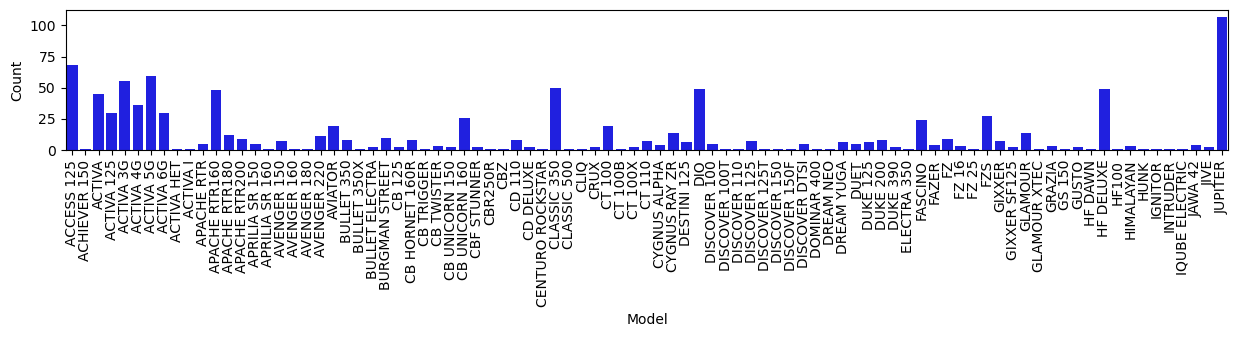

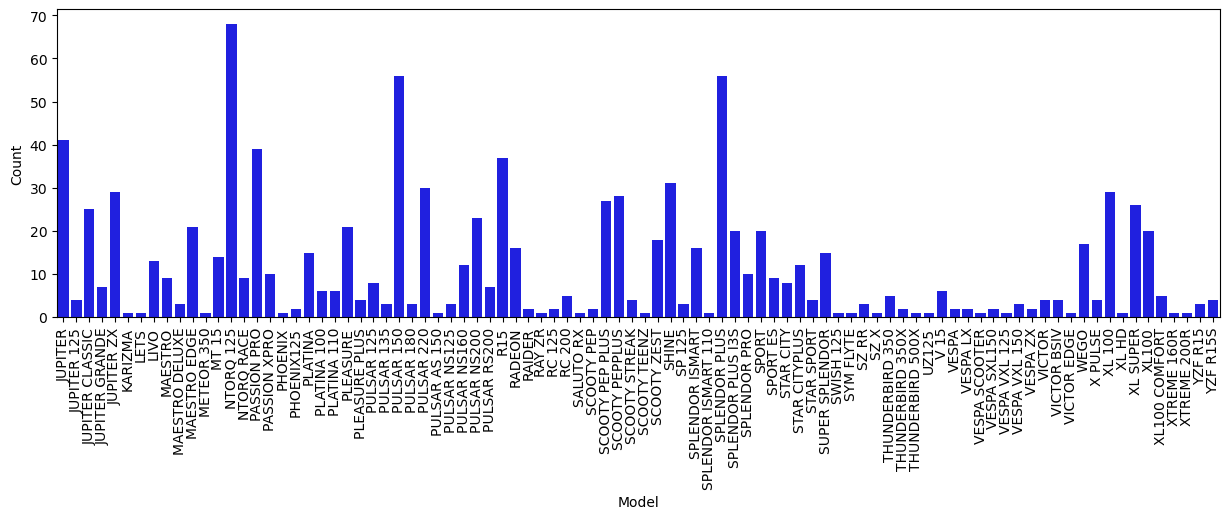

In [14]:
# checking the data distribution of categorical variable Model
plt.figure(figsize=(15,4))
ax=plt.subplot(2,1, 1)
sns.countplot(x=data['Model_new'].sort_values()[:1000], color='blue')
plt.xlabel("Model")
plt.xticks(rotation=90)
plt.ylabel("Count")
plt.show()
# checking the data distribution of categorical variables
plt.figure(figsize=(15,4))
sns.countplot(x=data['Model_new'].sort_values()[1000:], color='blue')
plt.xlabel("Model")
plt.xticks(rotation=90)
plt.ylabel("Count")
plt.show()

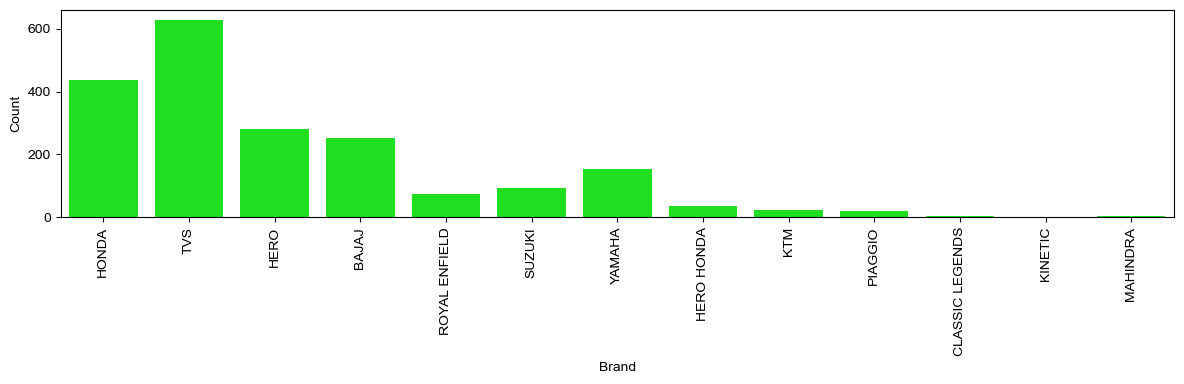

In [15]:
# checking the data distribution of categorical variable Brand
plt.figure(figsize=(12,4))
sns.countplot( x=data['Brand'], color='lime')
sns.set(font_scale=1)
plt.xlabel("Brand")
plt.xticks(rotation=90)
plt.ylabel("Count")
plt.tight_layout()
plt.show()


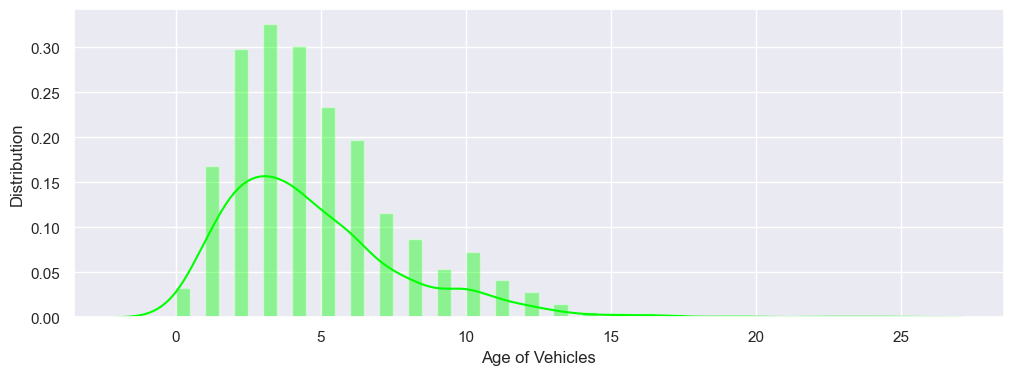

In [16]:
# checking the distribution of Age and CC
plt.figure(figsize=(12,4))
sns.distplot( data['Age'], color='lime')
plt.xlabel('Age of Vehicles')
plt.ylabel('Distribution')
plt.show()


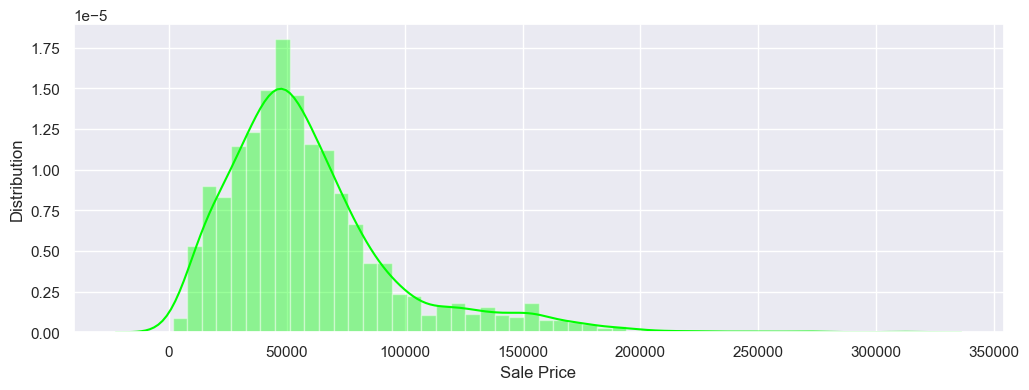

In [17]:

# checking the distribution of Age and CC
plt.figure(figsize=(12,4))
sns.distplot( data['Sale_Price'], color='lime')
plt.xlabel('Sale Price')
plt.ylabel('Distribution')
plt.show()

#### Bi-variate analysis

In [18]:
# columns = ['Age','CC',"Brand",'Model_new']
# plt.figure(figsize=(12,4))
# plt_num = 1
# for cols in columns:
#     ax = plt.subplot(2,2,plt_num)
#     sns.scatterplot(x=data[cols], y=data['Sale_Price'], c='lime')
#     plt.xlabel(cols)
#     plt.ylabel('Sale_price')
#     plt_num += 1
# plt.tight_layout()
# plt.show()

In [19]:
# sns.pairplot(data)

## data preprocessing

### Filtering data with minimum 4 records for each model

In [20]:
Grouped_ABM = data.groupby(['Brand','Model_new','Age']).size().reset_index()
Grouped_ABM = Grouped_ABM.loc[ Grouped_ABM[0] >= 2]


In [21]:
Grouped_data = Grouped_ABM.groupby(['Brand','Model_new']).size().reset_index()
Grouped_data = Grouped_data.sort_values(0, ascending=False)
Grouped_data = Grouped_data.loc[ Grouped_data[0] > 4]

In [22]:

List_models = Grouped_data['Model_new'].unique()

# Another method
# data.groupby(['Model_new']).filter(lambda x: len(x) > 10 )

# using only records based on List_modelsabs
data = data.loc[ data['Model_new'].isin(List_models)]
data.reset_index(drop=True,inplace=True)

# Testing data
data_test = data_test.loc[ data_test['Model_new'].isin(List_models)]
data_test.reset_index(drop=True,inplace=True)

In [23]:
brand_list = data['Brand'].unique()

In [24]:
# for brand in brand_list:
#     lls = data.loc[ data['Brand'] == brand]['Model_new'].unique()
#     lls1 = data.loc[ data['Brand'] == brand]['CC'].unique()
#     print(brand)
#     print(lls)
#     print(lls1)

### Filtering data with Age less than 7 years

In [25]:
data = data.loc[ data['Age'] <= 7 ]
data_test = data_test.loc[ data_test['Age'] <= 7 ]

In [26]:
List_models

array(['APACHE RTR160', 'JUPITER', 'ACCESS 125', 'SCOOTY PEP PLUS',
       'PULSAR 150', 'FZS', 'ACTIVA', 'CB UNICORN 160', 'DIO',
       'CLASSIC 350', 'SHINE', 'PASSION PRO', 'PULSAR 220', 'FASCINO',
       'SPLENDOR PLUS', 'JUPITER ZX', 'XL SUPER', 'WEGO', 'HF DELUXE',
       'AVIATOR', 'SCOOTY PEPPLUS', 'ACTIVA 125', 'CT 100', 'SPORT'],
      dtype=object)

### Dropping Extreme values from each make model combination and keeping only between 25 to 75 % range

In [27]:
for model in List_models:
    Age = np.linspace(1,7,7)
    for age in Age:
        data_filt = data.loc[ (data['Model_new'] == model ) & ( data['Age'] == age)]
        data_filt_test = data_test.loc[ (data_test['Model_new'] == model ) & ( data_test['Age'] == age)]
        if len (data_filt) >= 3:
            data_filter1 = data_filt['Sale_Price'].values
            rang_25, rang_75 = np.percentile(data_filter1, [25, 75])
            data.drop ( data_filt.loc [ (data_filt['Sale_Price'] < rang_25 ) |
                            (data_filt['Sale_Price'] > rang_75)].index, 
                      inplace = True)
            # filterign testing data aswell
            data_test.drop ( data_filt_test.loc [ (data_filt_test['Sale_Price'] < rang_25 ) |
                            (data_filt_test['Sale_Price'] > rang_75)].index, 
                      inplace = True)

### Checking each make model and age combination Sale_price

In [28]:
for model in List_models:
    Age = np.linspace(1,7,7)
    for age in Age:
        print(data.loc[ (data['Model_new'] == model ) & ( data['Age'] == age), ['Brand','Model_new','Age','CC','Sale_Price']])

    Brand      Model_new  Age     CC  Sale_Price
113   TVS  APACHE RTR160    1  160.0     99000.0
527   TVS  APACHE RTR160    1  160.0    101000.0
640   TVS  APACHE RTR160    1  160.0    109400.0
    Brand      Model_new  Age     CC  Sale_Price
510   TVS  APACHE RTR160    2  160.0     75436.0
607   TVS  APACHE RTR160    2  160.0     66300.0
700   TVS  APACHE RTR160    2  160.0     90500.0
891   TVS  APACHE RTR160    2  160.0     66500.0
    Brand      Model_new  Age     CC  Sale_Price
245   TVS  APACHE RTR160    3  160.0    83500.00
258   TVS  APACHE RTR160    3  160.0    90400.00
279   TVS  APACHE RTR160    3  160.0    70772.32
466   TVS  APACHE RTR160    3  160.0    78000.00
    Brand      Model_new  Age     CC  Sale_Price
64    TVS  APACHE RTR160    4  160.0     93000.0
375   TVS  APACHE RTR160    4  160.0     79600.0
686   TVS  APACHE RTR160    4  160.0     69000.0
847   TVS  APACHE RTR160    4  160.0     72300.0
    Brand      Model_new  Age     CC  Sale_Price
129   TVS  APACHE RT

Empty DataFrame
Columns: [Brand, Model_new, Age, CC, Sale_Price]
Index: []
Empty DataFrame
Columns: [Brand, Model_new, Age, CC, Sale_Price]
Index: []
Empty DataFrame
Columns: [Brand, Model_new, Age, CC, Sale_Price]
Index: []
     Brand Model_new  Age     CC  Sale_Price
651  HONDA    ACTIVA    5  110.0     38080.0
Empty DataFrame
Columns: [Brand, Model_new, Age, CC, Sale_Price]
Index: []
     Brand Model_new  Age     CC  Sale_Price
406  HONDA    ACTIVA    7  110.0     31840.0
587  HONDA    ACTIVA    7  110.0     42000.0
     Brand       Model_new  Age     CC  Sale_Price
721  HONDA  CB UNICORN 160    1  150.0    104000.0
     Brand       Model_new  Age     CC  Sale_Price
320  HONDA  CB UNICORN 160    2  150.0     83500.0
     Brand       Model_new  Age     CC  Sale_Price
876  HONDA  CB UNICORN 160    3  150.0     64234.0
932  HONDA  CB UNICORN 160    3  150.0     92000.0
     Brand       Model_new  Age     CC  Sale_Price
184  HONDA  CB UNICORN 160    4  150.0    41959.96
255  HONDA  CB U

Empty DataFrame
Columns: [Brand, Model_new, Age, CC, Sale_Price]
Index: []
Empty DataFrame
Columns: [Brand, Model_new, Age, CC, Sale_Price]
Index: []
Empty DataFrame
Columns: [Brand, Model_new, Age, CC, Sale_Price]
Index: []
Empty DataFrame
Columns: [Brand, Model_new, Age, CC, Sale_Price]
Index: []
    Brand Model_new  Age     CC  Sale_Price
226   TVS      WEGO    5  110.0     28500.0
552   TVS      WEGO    5  110.0     14000.0
    Brand Model_new  Age     CC  Sale_Price
602   TVS      WEGO    6  110.0     55000.0
Empty DataFrame
Columns: [Brand, Model_new, Age, CC, Sale_Price]
Index: []
    Brand  Model_new  Age    CC  Sale_Price
832  HERO  HF DELUXE    1  97.0     51680.0
    Brand  Model_new  Age    CC  Sale_Price
1    HERO  HF DELUXE    2  97.0    46787.56
50   HERO  HF DELUXE    2  97.0    47412.00
134  HERO  HF DELUXE    2  97.0    48572.16
168  HERO  HF DELUXE    2  97.0    46782.00
461  HERO  HF DELUXE    2  97.0    46642.00
506  HERO  HF DELUXE    2  97.0    48010.00
525  HERO

## Models and Brands has to be used in frontend

In [29]:
data[['Brand','Model_new','Age','CC']].drop_duplicates(subset=['Model_new','Brand']).to_csv("Model_used_for_traing.csv")

In [30]:
# data_for_streamlit = data[['Brand','Model_new','CC']]
# data_for_streamlit.to_csv("data_for_streamlit.csv")
# category_dict = {}
# for _, row in data.iterrows():
#     if row['Brand'] not in category_dict:
#         category_dict[row['Brand']] = []
#     if row['Model_new'] not in category_dict[row['Brand']]:
#         category_dict[row['Brand']].append(row['Model_new'])
# category_dict = {}
# for _, row in data.iterrows():
#     if row['Model_new'] not in category_dict:
#         category_dict[row['Model_new']] = []
#     if row['CC'] not in category_dict[row['Model_new']]:
#         category_dict[row['Model_new']].append(row['CC'])
# data['CC']  = data['CC'].astype('int')
# Brand_list =['Select here']
# Brand_list.append(data['Brand'].unique().values())

### Dropping some irrelevant data of Sale_price with respect to Age

In [31]:
# dropping Age 7 with higher selling price
data.drop(data.loc[ (data['Model_new'] == 'SCOOTY PEP PLUS' )
                   & ( data['Age'] == 5) & ( data['Sale_Price'] < 30000)].index, inplace=True)
# dropping Age 1 with 153000 since the vehcile can't be sold for 1.53k
data.drop(data.loc[ (data['Model_new'] == 'PULSAR 150' )
                   & ( data['Age'] == 5) & ( data['Sale_Price'] < 50000)].index, inplace=True)

# dropping Age 3 with higher selling price
data.drop(data.loc[ (data['Model_new'] == 'CT 100' )
                   & ( data['Age'] == 6) & ( data['Sale_Price'] > 30000)].index, inplace=True)

In [32]:
training_data = data.copy()

### Missing/Null values 

In [33]:
data.isna().sum()

REG_NO                  0
Brand                   0
Model                   0
CC                      0
Manufactured_Date       0
DEALER_ID               0
DEALERSHIP_NAME         0
Purchase_date           0
Color                   0
Purchase_Price          0
Source                  0
Refurbish_Date         12
Variant               248
PART_DESCRIPTION      191
Part_Cost             191
Labour_Description    267
Labour_Amount          12
Refurbished_price     191
Sale_Date               0
Year                    0
Sale_Price              0
Financier               0
Model_new               0
Varient               178
Age                     0
dtype: int64

* We dont have any null values in the features we will use for Model building, Brand, Model_new, CC, Age and Target variable is Sales_Price

### Encoding

In [34]:
data = data[['Brand','Model_new','CC','Age','Sale_Price']]

In [35]:
# Encoding Categorical variables into numerical
Brand_encoding = OneHotEncoder(cols='Brand',handle_unknown='return_nan',return_df=True,use_cat_names=True)
data = Brand_encoding.fit_transform(data)

In [36]:
from category_encoders import BinaryEncoder

Model_encoder = BinaryEncoder(cols=['Model_new'])
data_encoded = Model_encoder.fit_transform(data['Model_new'])
data = pd.concat([data, data_encoded], axis=1)
data.drop('Model_new',axis=1,inplace=True)

In [37]:
# # Encoding Categorical variables into numerical
# Model_encoding = BaseNEncoder(cols=['Model_new'],return_df=True,base=5)
# data = Model_encoding.fit_transform(data)

### Outlier detection

In [38]:
# # PLOTTING Box plot for detecting outliers
# plt.figure(figsize=(12,5))
# columns = ['CC','Age','Sale_Price']
# plt_num = 1
# for cols in columns:
#     ax = plt.subplot(2,2, plt_num)
#     sns.boxplot(data[cols])
#     plt.xlabel(cols)
#     plt_num += 1
# plt.show()
    


In [39]:
# Age Maximum and minimum values
Q1_age = np.quantile(data['Age'], q = 0.25)
Q2_age = np.quantile(data['Age'], q = 0.5)
Q3_age = np.quantile(data['Age'], q = 0.75)

IQR_age = Q3_age - Q1_age
Maximum_Age = Q3_age + (1.5 * IQR_age)
Minimum_Age = Q1_age - (1.5 * IQR_age)

print("Maximum range of Age:", Maximum_Age)
print("Minimum range of Age:", Minimum_Age)

Maximum range of Age: 9.5
Minimum range of Age: -2.5


In [40]:
# CC Maximum and minimum values falls under Normal distribution are
Q1_cc = np.quantile(data['CC'], q = 0.25)
Q2_cc = np.quantile(data['CC'], q = 0.5)
Q3_cc = np.quantile(data['CC'], q = 0.75)

IQR_CC = Q3_cc - Q1_cc
Maximum_CC = Q3_cc + (1.5 * IQR_CC)
Minimum_CC = Q1_cc - (1.5 * IQR_CC)

print("Maximum range of CC:", Maximum_CC)
print("Minimum range of CC:", Minimum_CC)

Maximum range of CC: 207.5
Minimum range of CC: 51.5


In [41]:
# Saleprice Maximum and minimum values falls under Normal distribution are
Q1_sale_price = np.quantile(data['Sale_Price'], q = 0.25)
Q2_sale_price = np.quantile(data['Sale_Price'], q = 0.5)
Q3_sale_price = np.quantile(data['Sale_Price'], q = 0.75)

IQR_sale_price = Q3_sale_price - Q1_sale_price
Maximum_sale_price = Q3_sale_price + (1.5 * IQR_sale_price)
Minimum_sale_price = Q1_sale_price - (1.5 * IQR_sale_price)

print("Maximum range of Sale_Price:", Maximum_sale_price)
print("Minimum range of Sale_Price:", Minimum_sale_price)

Maximum range of Sale_Price: 104997.0
Minimum range of Sale_Price: 9005.0


* From Age Box plot: we can observe that Age > 10.5 data falls beyond normal distribution range
* From Sale_Price Box plot: Sale_price should lies between 124995.0 and 0, to fall under normal distribution range
* From CC Box plot: CC values sould lies between 172.5 and 72.5, to fall under normal distribution range

In [42]:
# # dropping Age more than 10 years,  Sale_price more than 120_000 and CC more than 200
# data.drop( data.loc[ data['CC'] > 200 ].index, inplace=True )
# data.drop( data.loc[ data['Age'] > 10 ].index, inplace=True )
# data.drop( data.loc[data['Sale_Price'] > 120000].index, inplace=True )

In [43]:
# resetting index
data.reset_index(drop=True, inplace=True)

### Transformation

In [44]:
# as of now not trying for any transformation techniques

## Feature Selection

#### Checking for duplicate rows

<Axes: >

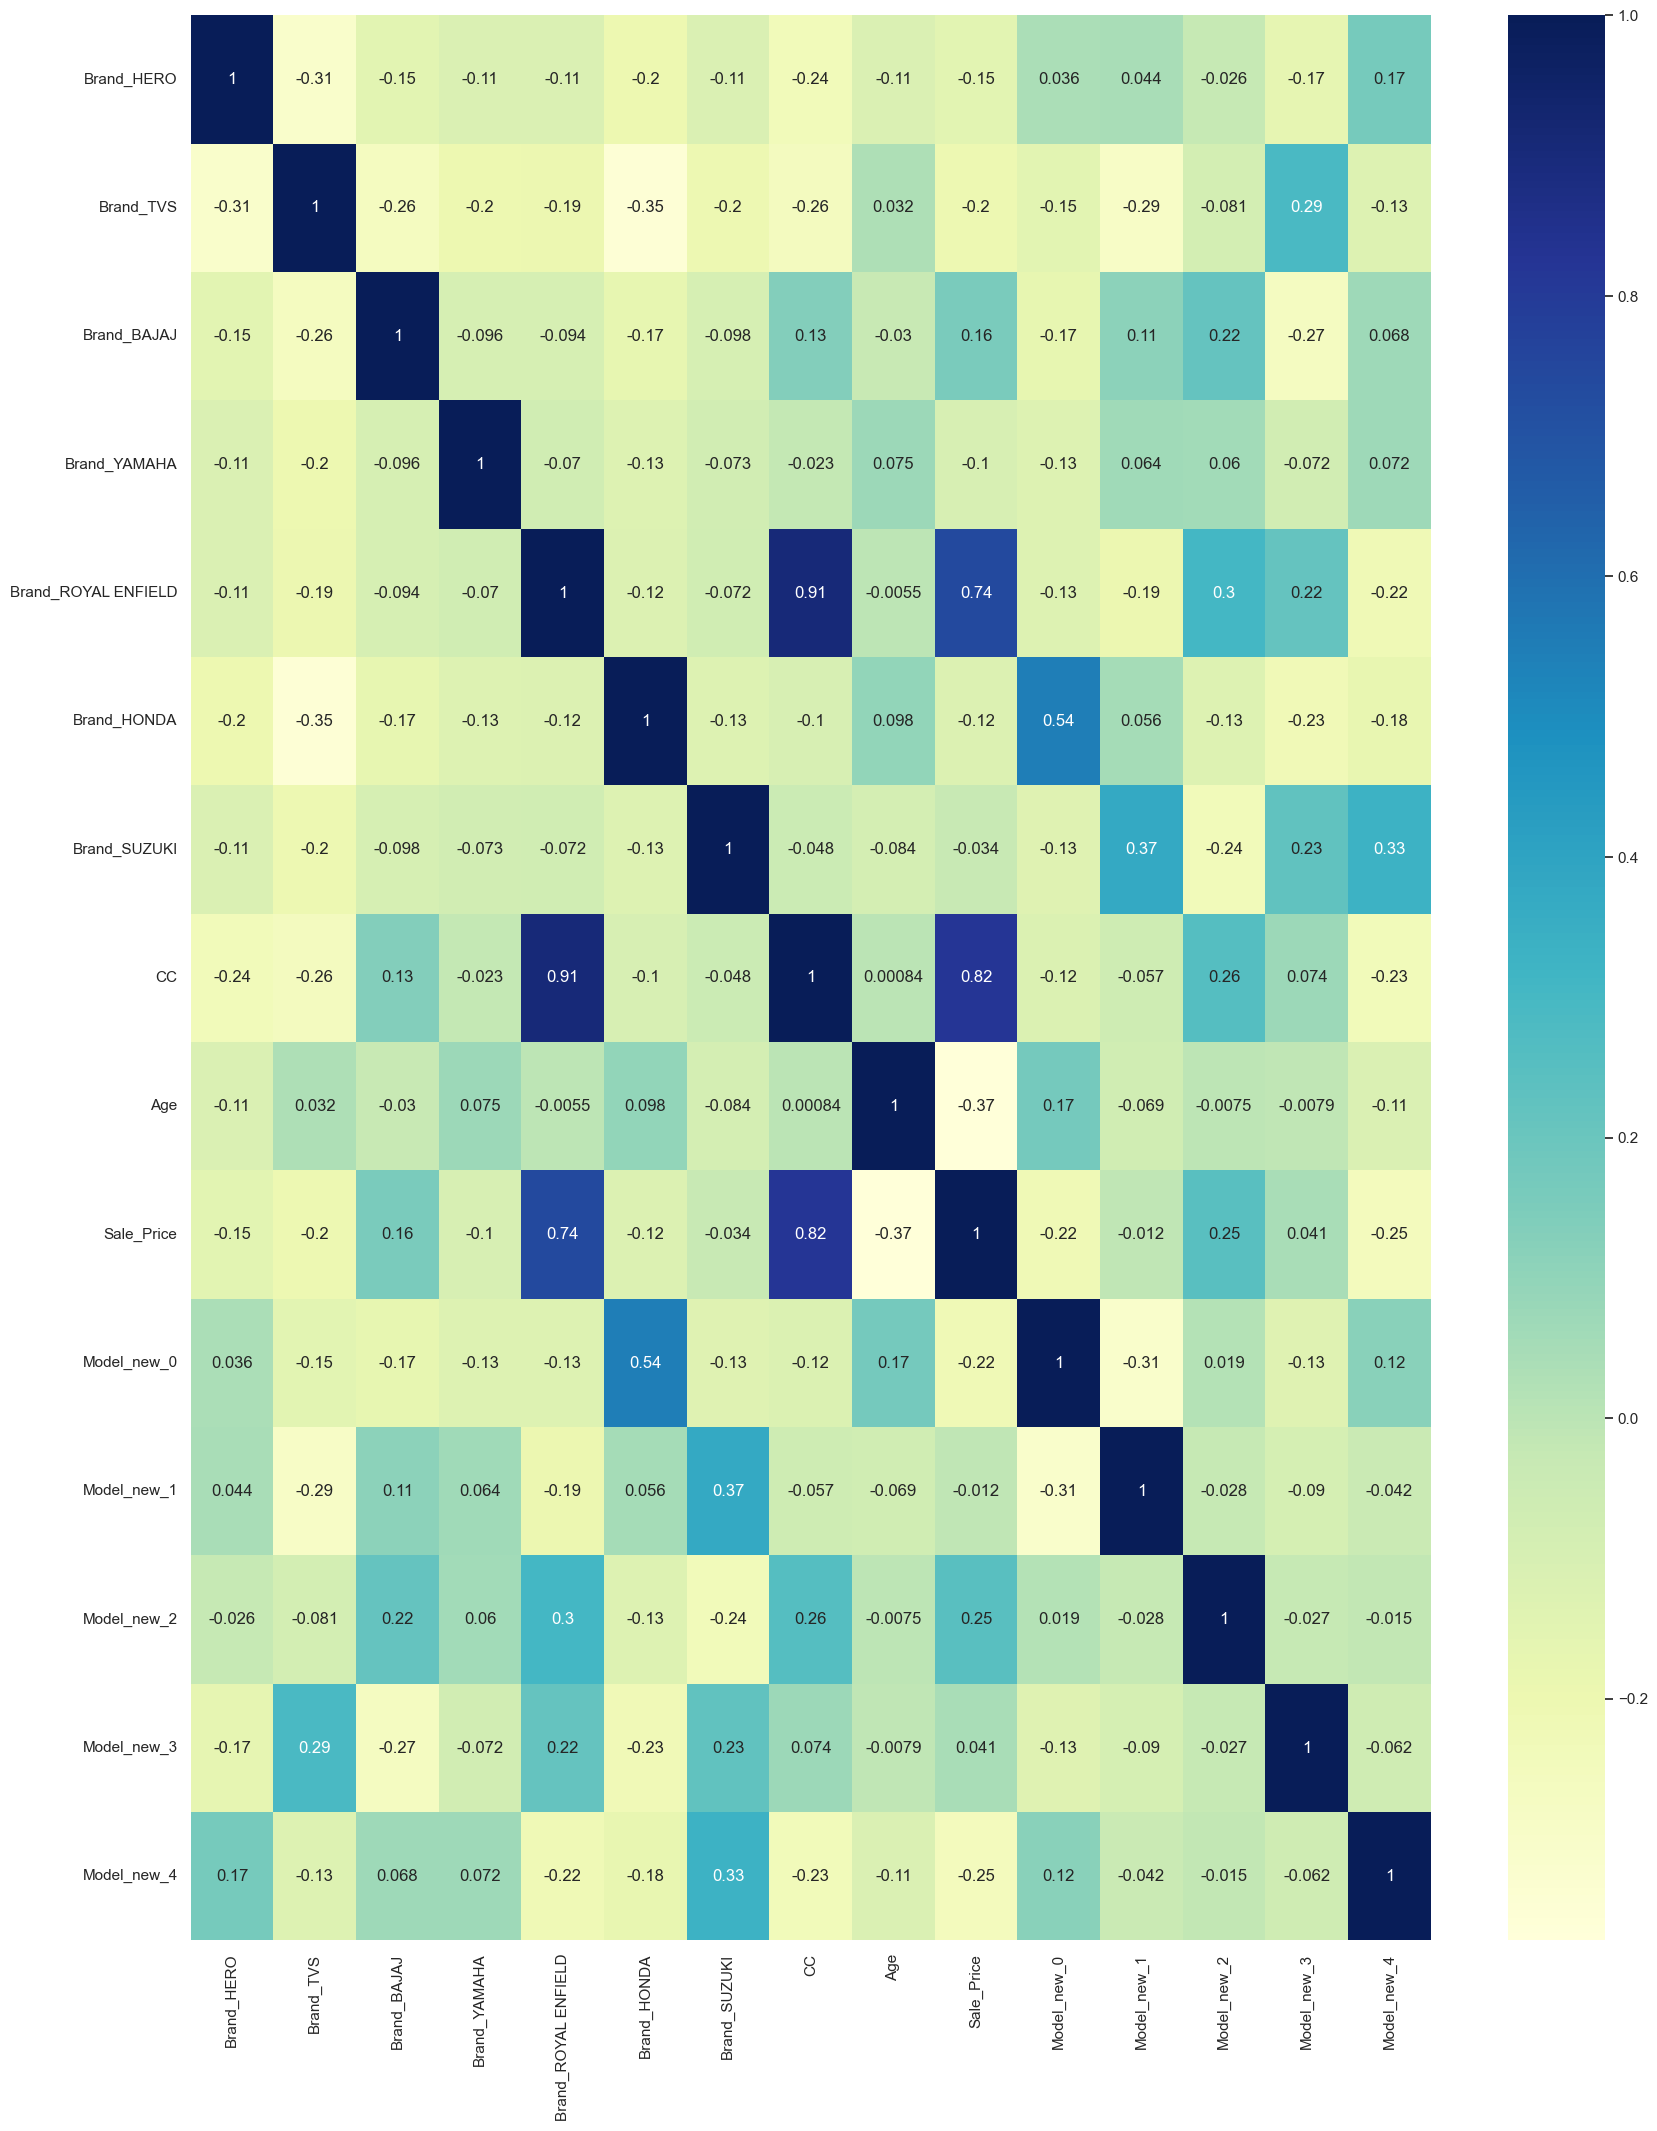

In [45]:
# plotting heatmap to check the correlation
plt.figure(figsize=(20,25))
sns.heatmap(data.corr(), annot=True, cmap='YlGnBu')

* Both manufacture_date and Sale_date have high correlation with Age , since Age calculated from these two features

In [46]:
data.columns

Index(['Brand_HERO', 'Brand_TVS', 'Brand_BAJAJ', 'Brand_YAMAHA',
       'Brand_ROYAL ENFIELD', 'Brand_HONDA', 'Brand_SUZUKI', 'CC', 'Age',
       'Sale_Price', 'Model_new_0', 'Model_new_1', 'Model_new_2',
       'Model_new_3', 'Model_new_4'],
      dtype='object')

In [47]:
training_columns = ['Brand_HERO', 'Brand_TVS', 'Brand_BAJAJ', 'Brand_YAMAHA',
       'Brand_ROYAL ENFIELD', 'Brand_HONDA', 'Brand_SUZUKI',
                    'CC','Age','Model_new_0', 'Model_new_1', 'Model_new_2', 'Model_new_3',
       'Model_new_4','Sale_Price']
data = data[training_columns]

In [48]:
# checking duplicate data points
data.duplicated().sum()

18

In [49]:
# dropping duplicate rows
data.drop_duplicates(inplace=True)

In [50]:
data.duplicated().sum()

0

# Model building

#### Splitting data into dependent and inpedendent features

In [51]:
# splitting data into x and y
x = data.drop("Sale_Price", axis=1)
y = data.Sale_Price

# splitting data from traing and validation
x_train, x_val , y_train, y_val = train_test_split(x,y, test_size = 0.25, random_state=11)

#### Scaling

In [52]:
# saling down Age and CC to keep all the features in same scale
scaler = StandardScaler()
x_train[['Age','CC']] = scaler.fit_transform(x_train[['Age','CC']])
x_val[['Age','CC']] = scaler.transform(x_val[['Age','CC']])

#### Model training

In [53]:
from sklearn.ensemble import RandomForestRegressor
Model = RandomForestRegressor(random_state=42)

Model.fit(x_train,y_train)

prediction = Model.predict(x_val)

R2_score =r2_score(y_val,prediction)
n = x_val.shape[0]
p = x_val.shape[1]
Adjusted_R2 = 1- (((1-R2_score)*(n-1)) / (n-p-1))
MSE = mean_squared_error(y_val, prediction)

print("R2 score is:", R2_score)
print("Adjusted R2 score is:", Adjusted_R2)
print("Mean squared error is:", MSE)

R2 score is: 0.880838087277958
Adjusted R2 score is: 0.8594500516611812
Mean squared error is: 135458217.40869933


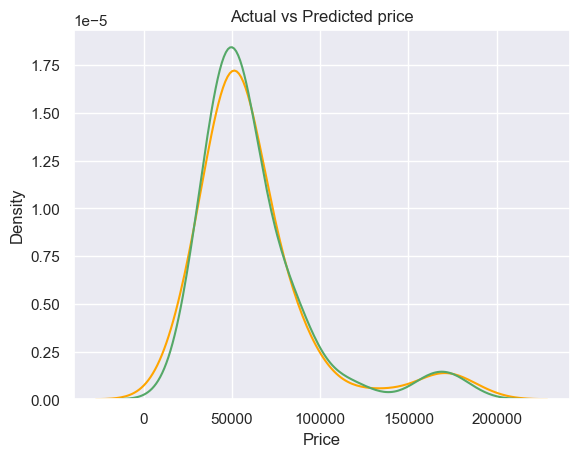

In [54]:
# lets check comparison of testing and predicted data
ax1=sns.distplot(y_val, hist=False,color="orange")
sns.distplot(prediction, hist=False,color="g",ax=ax1)

plt.title("Actual vs Predicted price")
plt.xlabel("Price")

plt.show()

#### Accuracy:

In [55]:
accu_data = pd.DataFrame( columns=["Actual","Predicted"])
accu_data['Actual'],accu_data['Predicted'] = y_val.values, prediction
accu_data['Accuracy'] = (1 - abs((accu_data['Predicted'] - accu_data['Actual'])/accu_data['Actual']))*100
accuracy_test = round(accu_data['Accuracy'].mean(),2)
accuracy_test

81.34

In [56]:
x_train.shape

(278, 14)

## Testing Data

In [57]:
data_test = data_test.loc[data_test['Model_new'].isin(List_models)]
data_test1 = data_test[['REG_NO','Brand','Model_new',"CC",'Age','Sale_Price']]
data_test = data_test[['Brand','Model_new',"CC",'Age','Sale_Price']]

data_test = Brand_encoding.transform(data_test)

data_encoded1 = Model_encoder.transform(data_test['Model_new'])
data_test = pd.concat([data_test, data_encoded1], axis=1)


# reordering testing data columns in as traing data columns
data_test = data_test[training_columns]

# dropping nan values and duplicate values
data_test.dropna(inplace=True)
data_test.drop_duplicates(inplace=True)
data_test1 = data_test1.drop_duplicates(subset=['Brand','Model_new',"CC",'Age','Sale_Price'])

In [58]:
# splitting data and scaling it
x_test = data_test.drop("Sale_Price", axis=1)
y_test = data_test['Sale_Price']

x_test[['Age','CC']] = scaler.transform(x_test[['Age','CC']])

# prediction
test_prediction = Model.predict(x_test)
# checking the model performance
MSE = mean_squared_error(y_test,test_prediction)
print("R2_score:" , r2_score(y_test,test_prediction))
print("MAE:", mean_absolute_error(y_test,test_prediction))
print("MSE:", mean_squared_error(y_test,test_prediction))

print("Testing accuracy:",Model.score(x_test,y_test))

# Adjusted r2 score
n=x_test.shape[0]
p=x_test.shape[1]
r2 = r2_score(y_test,test_prediction)
adjusted_r2=1- ((1-r2)*(n-1))/(n-p-1)
print("Adjusted_R2_score",adjusted_r2)

R2_score: 0.8384310376629505
MAE: 7761.704708627428
MSE: 120057719.84601372
Testing accuracy: 0.8384310376629505
Adjusted_R2_score 0.8074452092695437


In [59]:
accu_test = pd.DataFrame( columns=["Actual","Predicted"])
accu_test['Actual'],accu_test['Predicted'] = y_test.values, test_prediction
accu_test['Accuracy'] = (1 - abs((accu_test['Predicted'] - accu_test['Actual'])/accu_test['Actual']))*100
accuracy_test_data = round(accu_test['Accuracy'].mean(),2)
accuracy_test_data

84.16

### test data

In [60]:
data_test1['Prediction'] = test_prediction
data_test1['Prediction'] = round(data_test1['Prediction'])
data_test1['Accuracy'] = abs(1 - abs((data_test1['Prediction'] - data_test1['Sale_Price'])/data_test1['Sale_Price']))*100

In [61]:
accuracy_mean = data_test1.groupby(['Brand','Model_new'])['Accuracy'].mean().reset_index()
test_records_count = data_test1.groupby(['Brand','Model_new']).size().to_frame('Testing_Count').reset_index()
training_data_count = training_data.groupby(['Brand','Model_new']).size().to_frame('Training_Count').reset_index()
Final_metrics = accuracy_mean.merge(test_records_count, on=['Model_new'])
Final_metrics.rename(columns={'Brand_x':'Brand'}, inplace=True)
Final_metrics = Final_metrics.merge(training_data_count, on=['Model_new'])
Final_metrics.rename(columns={'Brand_x':'Brand'}, inplace=True)
Final_metrics = Final_metrics[['Brand','Model_new','Accuracy','Testing_Count','Training_Count']]
Final_metrics = Final_metrics.sort_values('Testing_Count', ascending=False).reset_index(drop=True)

In [62]:
Final_metrics = Final_metrics[['Brand','Model_new','Accuracy','Testing_Count','Training_Count']]
Final_metrics.sort_values('Testing_Count', ascending=False).reset_index(drop=True)

Brand       Model_new   Accuracy  Testing_Count  Training_Count
0             TVS         JUPITER  90.293941             19              68
1             TVS   APACHE RTR160  83.067471              7              20
2           BAJAJ      PULSAR 220  83.207925              6              12
3            HERO       HF DELUXE  84.093405              6              22
4            HERO   SPLENDOR PLUS  84.394797              6              23
5          SUZUKI      ACCESS 125  91.813523              5              27
6           HONDA           SHINE  87.906433              4              12
7           HONDA  CB UNICORN 160  70.706377              4              10
8          YAMAHA         FASCINO  76.790810              4              14
9           HONDA          ACTIVA  89.869565              4               3
10            TVS      JUPITER ZX  92.266795              3              15
11          BAJAJ          CT 100  80.640948              3              10
12          HONDA             DIO  95.123564              3              26
13           HERO     PASSION PRO  94.994301              3              13
14          BAJAJ      PULSAR 150  87.697166              3              22
15  ROYAL ENFIELD     CLASSIC 350  97.208701              2              25
16          HONDA      ACTIVA 125  90.317030              2              16
17            TVS  SCOOTY PEPPLUS  98.500000              1              17
18            TVS           SPORT  81.743048              1               7
19            TVS            WEGO  57.066038              1               3
20            TVS        XL SUPER  58.161538              1               2

In [63]:
Final_metrics = Final_metrics.sort_values('Accuracy',ascending=False)
Final_metrics['Accuracy'] = round(Final_metrics['Accuracy'])

In [69]:
data_test1.to_csv("ModelM116_Actual_predicted_prices.csv")

In [67]:
import plotly.graph_objects as go

# Sample data
Accuracy = Final_metrics['Accuracy']
training = Final_metrics['Training_Count']
testing = Final_metrics['Testing_Count']

# Create the figure
fig = go.Figure()

# Add the accuracy data as a bar trace
fig.add_trace(go.Bar(
    x=['JUPITER','APACHE RTR160',
 'PULSAR 220', 'HF DELUXE', 'SPLENDOR PLUS', 'ACCESS 125', 'SHINE',
 'CB UNICORN 160', 'FASCINO', 'ACTIVA', 'DIO', 'PULSAR 150', 'PASSION PRO',
 'JUPITER ZX', 'CT 100', 'CLASSIC 350', 'ACTIVA 125', 'SCOOTY PEPPLUS', 'SPORT', 'WEGO', 'XL SUPER'],
    y=Accuracy,
    name='Accuracy',
    marker_color='#33ff99',
    text=Accuracy,
    textposition='auto'
))

# Add the training data as a bar trace
fig.add_trace(go.Bar(
    x=['JUPITER','APACHE RTR160',
 'PULSAR 220', 'HF DELUXE', 'SPLENDOR PLUS', 'ACCESS 125', 'SHINE',
 'CB UNICORN 160', 'FASCINO', 'ACTIVA', 'DIO', 'PULSAR 150', 'PASSION PRO',
 'JUPITER ZX', 'CT 100', 'CLASSIC 350', 'ACTIVA 125', 'SCOOTY PEPPLUS', 'SPORT', 'WEGO', 'XL SUPER'],
    y=training,
    name='Training',
    marker_color='#8000ff',
    text=training,  # Values to be displayed on the bars
    textposition='auto'
))

# Add the testing data as a bar trace
fig.add_trace(go.Bar(
    x=['JUPITER','APACHE RTR160',
 'PULSAR 220', 'HF DELUXE', 'SPLENDOR PLUS', 'ACCESS 125', 'SHINE',
 'CB UNICORN 160', 'FASCINO', 'ACTIVA', 'DIO', 'PULSAR 150', 'PASSION PRO',
 'JUPITER ZX', 'CT 100', 'CLASSIC 350', 'ACTIVA 125', 'SCOOTY PEPPLUS', 'SPORT', 'WEGO', 'XL SUPER'],
    y=testing,
    name='Testing',
    marker_color='#f5873d',
        text=testing,  # Values to be displayed on the bars
    textposition='auto'
))

# Update the layout
fig.update_layout(
    title={
        'text': 'Accuracy Comparison of ML Model for Each Brand and Model with Training and Testing Records',
        'font': {
            'size': 26
        },'pad': {'t': 80 , 'l':10}},
    xaxis=dict(title='Model',tickangle=90,titlefont=dict(size=22)),
    yaxis=dict(title='Accuracy/Count',titlefont=dict(size=22)),
    barmode='group'
)

# Display the figure
fig.show()
fig.write_image("Accuracy Comparison of ML Model.png", scale=2.5,width=1400, height=750,)


### Model Saving

In [ ]:
# import pickle
# with open('Final_sale_price_model.pkl', 'wb') as file:
#     pickle.dump({'Model': Model, 'training_columns': training_columns,
#                       'scaler_Age_CC': scaler,
#                       'Brand_encoding': Brand_encoding ,
#                       'Model_encoder': Model_encoder}, file)

In [ ]:
# pickle_file_path = "Final_sale_price_model.pkl"
# # Load the pickle file
# with open(pickle_file_path, 'rb') as file:
#     saved_models = pickle.load(file)

# # Extract the model objects and scaler
# Model = saved_models['Model']
# x_train_cols = saved_models['training_columns']
# scaler = saved_models['scaler_Age_CC']
# BaseN_encode_Model = saved_models['Model_encoder']
# OneHotEncode_Brand = saved_models['Brand_encoding']

# test_data = pd.DataFrame({  'Brand': [Brand],
#                         'Model_new': [Model] , 
#                         'CC': [CC], 
#                         'Age':[Age],
#                          'Sale_Price': 0})
# test_data = OneHotEncode_Brand.transform(test_data)
# data_encoded1 = BaseN_encode_Model.transform(test_data['Model_new'])
# test_data = pd.concat([test_data, data_encoded1], axis=1)

# test_data[['Age','CC']] = scaler.transform(test_data[['Age','CC']])
# test_data = test_data[x_train_cols]
# test_data.drop('Sale_Price', axis=1, inplace=True)
# sale_price = Model.predict(test_data)

## MLFLOW

In [ ]:
# # recording metrics to mlflow
# server_uri = 'https://mlflow.sirpi.co.in'

# os.environ["MLFLOW_TRACKING_URI"] = server_uri

# now = datetime.datetime.now()
# current_time = now.strftime("%Y-%m-%d %H:%M:%S")

# mlflow.set_experiment(experiment_name="bike_price_prediction")
# with mlflow.start_run(run_name=current_time):
#     mlflow.sklearn.log_model(
#         sk_model=Model,
#         artifact_path="RandomForest regressor_OHE_and_BaseN_encoding",
#         registered_model_name="M116",
#     )
#     #     mlflow.log_artifact()
#     mlflow.log_metric("R2 Score",R2_score)
#     mlflow.log_metric("Adjusted R2 Score",Adjusted_R2)
#     mlflow.log_metric("Mean squared error", MSE)
#     mlflow.log_metric("Accuracy", accuracy_test_data)
#     #     mlflow.log_param("Params",)
#     mlflow.end_run()